# Generate a data set

The dataset $\mathcal{D}$ is generated and stored in a pickle so it can be reused several times.

The dimension (i.e. number of features) of the dataset is $d=2$, as to easily visualize it.

The training set $\mathcal{X} = [-1, 1] \times [-1, 1]$ with uniform probability of picking each $x \in \mathcal{X}$

In each run, a random line is chosen as the target function $f$. This is done by choosing two random, uniformly distributed points in $[-1, 1] \times [-1, 1]$ and taking the line passing through them. One side of this line maps to $-1$, while the other maps to $1$.

Next, the input points $x_n$ are chosen uniformly from $\mathcal{X}$ and the target function is evaluated on each $x_n$ to get the corresponding outputs $y_n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
#Generate random points
#These have the shape (1000,2)
#Meaning each row is a point
#Since the seed is fixed, 
#these points will always be the same.

np.random.seed(123456789)
X = np.random.uniform(-1, 1, (1000, 2))

In [3]:
#This data set is saved so it can be used later on.

with open('dataset.pickle', 'wb') as f:
    pickle.dump(X, f, pickle.HIGHEST_PROTOCOL)

In [4]:
p = np.random.uniform(-1, 1, (2,2))

In [7]:
x = [[z,1] for z in p[:,0]]
y = p[:,1]
a,b = np.linalg.solve(x,y)
    
def f(x):
    return a*x+b

In [8]:
#Determine for each x in X whether it is above or below the line f
#This can be done using y=ax+b

Y = []
for x,y in X:
    y_line = f(x)
    if y <= y_line:
        Y.append(-1)
    else:
        Y.append(1)
Y = np.array(Y)

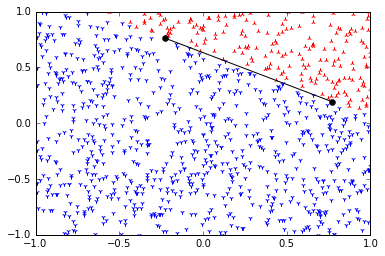

In [9]:
#Plot the results

plt.figure()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(p[:,0], p[:,1], color='k', marker='o')
for i in range(len(X)):
    point = X[i]
    sign = Y[i]
    if sign > 0:
        plt.scatter(point[0], point[1], color='r', marker='2')
    else:
        plt.scatter(point[0], point[1], color='b', marker='1')
plt.show()